# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

cities_org = pd.read_csv("cities.csv", encoding="utf-8")
cities_org.head()

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,ostrovnoy,2,RU,1558378754,72,68.05,39.51,37.50,7.16
1,1,mahebourg,75,MU,1558378503,74,-20.41,57.70,78.80,11.41
2,2,qaanaaq,25,GL,1558378755,73,77.48,-69.36,22.20,2.37
3,3,zhuhai,0,CN,1558378755,39,40.71,112.04,44.60,4.47
4,4,cape town,20,ZA,1558378755,76,-33.93,18.42,55.99,8.05


## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
latnlngs = [] # Create a list of latitude and longitude
cities = [] # Create a cities list

# Create a random range of latitudes and longitudes
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
latnlngs = zip(lats, lngs)

# Identify nearest city for each latitude and longitude
for latnlng in latnlngs:
    city = citipy.nearest_city(latnlng[0], latnlng[1]).city_name
     
    city = city.replace(" ", "%20") # Replace spaces with %20 to create url correctly
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city) # Append city to the dataframe

len(cities) # Count the number of cities

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
# define url
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

print(f"Data Processing")
print(f"-------------------------------")

#Loop through the cities in the city list 
# Create empty lists to append the API data into lists 
CityName = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
MaxTemp = []
WindSpeed = []

#Create counter for looping through the cities in the city list 
i = 1

for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        CityName.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        MaxTemp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        WindSpeed.append(response["wind"]["speed"])
        city_result = response["name"]
        print(f"Processing Record {i} | {city_result}")
        
        # Increase counter by one 
        i= i + 1
        
        time.sleep(1)
        
    # Skip to the next count to avoid errors
    except:
        print("Skip when city not found")
    continue

Data Processing
-------------------------------
Processing Record 1 | Kandi
Processing Record 2 | Alghero
Processing Record 3 | Mahébourg
Processing Record 4 | Yangambi
Processing Record 5 | Toropets
Processing Record 6 | Yining
Processing Record 7 | Emerald
Processing Record 8 | Plettenberg Bay
Processing Record 9 | Chokurdakh
Processing Record 10 | Punta Arenas
Processing Record 11 | Albany
Processing Record 12 | Namtsy
Processing Record 13 | Bluff
Processing Record 14 | Rikitea
Processing Record 15 | Mataura
Processing Record 16 | Kloulklubed
Processing Record 17 | Qaanaaq
Processing Record 18 | Wajima
Skip when city not found
Processing Record 19 | Olinda
Skip when city not found
Processing Record 20 | Tuatapere
Processing Record 21 | Ushuaia
Processing Record 22 | Nichinan
Processing Record 23 | Vila Velha
Processing Record 24 | Loandjili
Processing Record 25 | São Filipe
Processing Record 26 | Smithers
Processing Record 27 | San Bernardo
Processing Record 28 | George Town
Process

Processing Record 234 | Ortona
Processing Record 235 | Barrow
Skip when city not found
Processing Record 236 | Carnarvon
Processing Record 237 | Codajás
Processing Record 238 | Saint George
Processing Record 239 | Olafsvik
Processing Record 240 | Narragansett
Processing Record 241 | Kumul
Processing Record 242 | Talnakh
Processing Record 243 | Broome
Processing Record 244 | Naviraí
Processing Record 245 | Kahului
Skip when city not found
Processing Record 246 | Lebu
Processing Record 247 | Hithadhoo
Processing Record 248 | Krasne
Processing Record 249 | Ereymentau
Processing Record 250 | Zabul Province
Processing Record 251 | Kampot
Processing Record 252 | Tifton
Processing Record 253 | Grootfontein
Processing Record 254 | Necochea
Processing Record 255 | Aksarka
Processing Record 256 | Shingū
Processing Record 257 | Tūkrah
Processing Record 258 | Nizhnyaya Omka
Processing Record 259 | Ayan
Processing Record 260 | Gotha
Processing Record 261 | Griffith
Skip when city not found
Processi

Processing Record 467 | Sola
Skip when city not found
Processing Record 468 | Bengkulu
Processing Record 469 | Bonavista
Processing Record 470 | Korla
Processing Record 471 | Caravelas
Processing Record 472 | Dunedin
Skip when city not found
Processing Record 473 | Honiara
Processing Record 474 | Batagay
Processing Record 475 | Nome
Processing Record 476 | Lorengau
Processing Record 477 | Viedma
Skip when city not found
Processing Record 478 | Vila do Maio
Processing Record 479 | Bulawayo
Processing Record 480 | Barreirinha
Processing Record 481 | Gillette
Processing Record 482 | Sur
Processing Record 483 | Obo
Processing Record 484 | Orapa
Processing Record 485 | Ongandjera
Processing Record 486 | Nelson Bay
Processing Record 487 | Saint Anthony
Processing Record 488 | Plaster Rock
Processing Record 489 | Ōfunato
Skip when city not found
Processing Record 490 | Cuajinicuilapa
Processing Record 491 | Buerarema
Processing Record 492 | Ketchikan
Processing Record 493 | Tehachapi
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# create a dictionary for establishing dataframe
Weather_dic = {
    "City": CityName,
    "Date": date,
    "Cloudiness": cloudiness, 
    "Country": country,
    "Wind Speed": WindSpeed, 
    "Humidity": humidity,
    "Latitude": lat, 
    "Longitude": lng, 
    "Max Temp": MaxTemp}

# Create a data frame from dictionary
data = pd.DataFrame(Weather_dic)

# Save data frame to CSV
data.to_csv('weather_analysed.csv')

# Display data frame head 
data.head()


,City,Date,Cloudiness,Country,Wind Speed,Humidity,Latitude,Longitude,Max Temp
0,Kandi,1616240464,91,BJ,3.94,25,11.1342,2.9386,96.24
1,Alghero,1616240466,40,IT,17.27,62,40.5589,8.3181,53.60
2,Mahébourg,1616240468,75,MU,12.66,83,-20.4081,57.7000,82.40
3,Yangambi,1616240471,58,CD,2.33,38,0.8102,24.4336,95.79
4,Toropets,1616240472,86,RU,7.31,61,56.4978,31.6353,28.08


In [9]:
data.describe()

,Date,Cloudiness,Wind Speed,Humidity,Latitude,Longitude,Max Temp
count,5.840000e+02,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,1.616241e+09,54.683219,8.691712,70.333904,20.408658,16.566258,56.274161
std,3.878982e+02,37.078110,5.876503,21.994303,32.959863,87.972031,28.642614
min,1.616240e+09,0.000000,0.470000,1.000000,-54.800000,-179.166700,-34.400000
25%,1.616241e+09,20.000000,4.370000,60.000000,-5.238725,-58.836775,35.945000
50%,1.616241e+09,65.000000,7.080000,75.000000,22.180350,20.402700,63.910000
75%,1.616241e+09,90.000000,11.500000,87.000000,49.721325,91.372925,78.800000
max,1.616242e+09,100.000000,38.990000,100.000000,78.218600,178.416700,108.230000


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

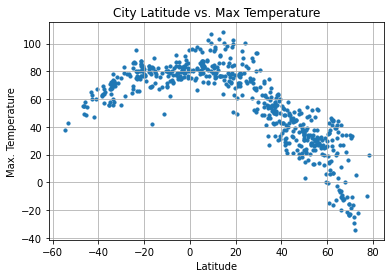

In [10]:
# Build a scatter plot for each data type
plt.scatter(data["Latitude"], data["Max Temp"], marker="o", s=10)
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Figures/Latitude_vs_Max_temp.png")
plt.show()

## Latitude vs. Humidity Plot

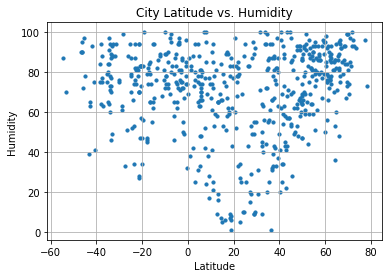

In [11]:
# Build a scatter plot for each data type
plt.scatter(data["Latitude"], data["Humidity"], marker="o", s=10)
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Figures/Latitude_vs_Humidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

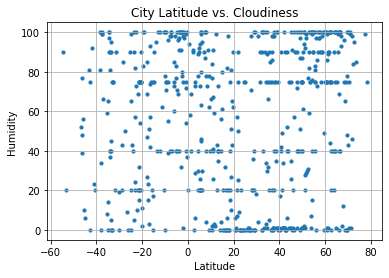

In [12]:
# Build a scatter plot for each data type
plt.scatter(data["Latitude"], data["Cloudiness"], marker="o", s=10)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Figures/Latitude_vs_Cloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

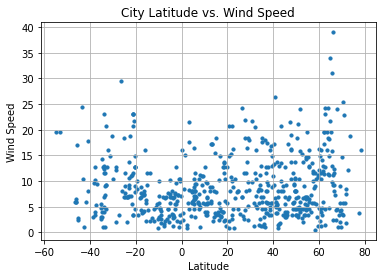

In [13]:
# Build a scatter plot for each data type
plt.scatter(data["Latitude"], data["Wind Speed"], marker="o", s=10)
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Figures/Latitude_vs_Wind_Speed.png")
plt.show()

## Linear Regression

In [14]:
# Generate Nothern and Southern Hemisphere DataFrame

north_hem = data.loc[data["Latitude"] >= 0]
south_hem = data.loc[data["Latitude"] < 0]

# Count the number of cities in both regions
north_cities = len(north_hem)
south_cities = len(south_hem)

print(f" The number of cities in Northern Hemisphere is: {north_cities}")
print(f" The number of cities in Southern Hemisphere is: {south_cities}")

 The number of cities in Northern Hemisphere is: 406
 The number of cities in Southern Hemisphere is: 178


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7857114761089627


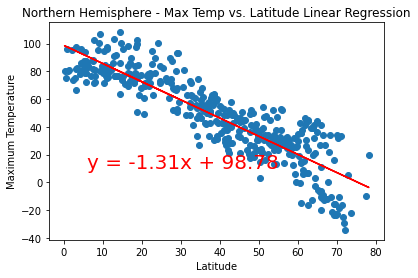

In [15]:
x_values = north_hem['Latitude']
y_values = north_hem['Max Temp']
(slope_temp, intercept_temp, rvalue_temp, pvalue_temp, stderr_temp) = linregress(x_values, y_values)
regress_values_temp = x_values * slope_temp + intercept_temp
line_eq = "y = " + str(round(slope_temp,2)) + "x + " + str(round(intercept_temp,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_temp,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-value is: {rvalue_temp**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.43396492357724203


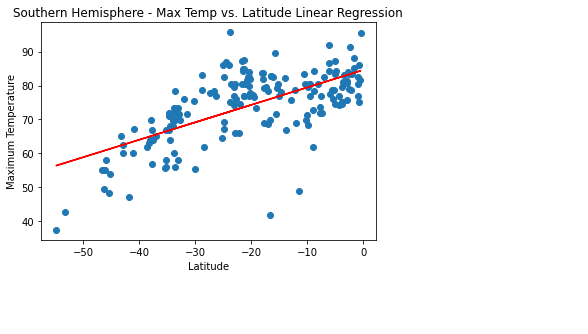

In [16]:
x_values = south_hem['Latitude']
y_values = south_hem['Max Temp']
(slope_temp, intercept_temp, rvalue_temp, pvalue_temp, stderr_temp) = linregress(x_values, y_values)
regress_values_temp = x_values * slope_temp + intercept_temp
line_eq = "y = " + str(round(slope_temp,2)) + "x + " + str(round(intercept_temp,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_temp,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f"The r-value is: {rvalue_temp**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.43396492357724203


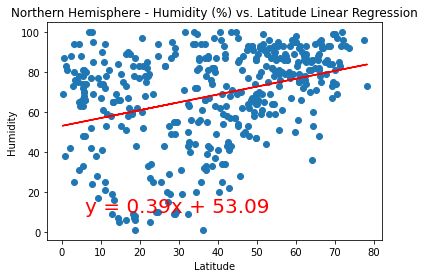

In [17]:
x_values = north_hem['Latitude']
y_values = north_hem['Humidity']
(slope_humid, intercept_humid, rvalue_humid, pvalue_humid, stderr_humid) = linregress(x_values, y_values)
regress_values_humid = x_values * slope_humid + intercept_humid
line_eq = "y = " + str(round(slope_humid,2)) + "x + " + str(round(intercept_humid,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_humid,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue_temp**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.43396492357724203


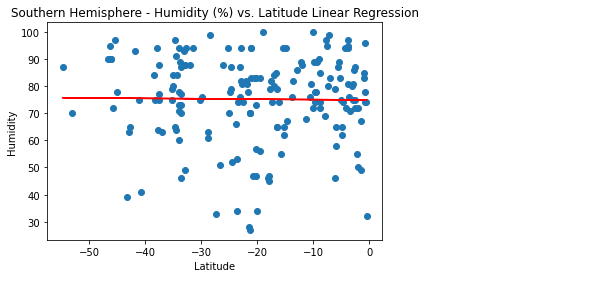

In [18]:
x_values = south_hem['Latitude']
y_values = south_hem['Humidity']
(slope_humid, intercept_humid, rvalue_humid, pvalue_humid, stderr_humid) = linregress(x_values, y_values)
regress_values_humid = x_values * slope_humid + intercept_humid
line_eq = "y = " + str(round(slope_humid,2)) + "x + " + str(round(intercept_humid,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_humid,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-value is: {rvalue_temp**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.43396492357724203


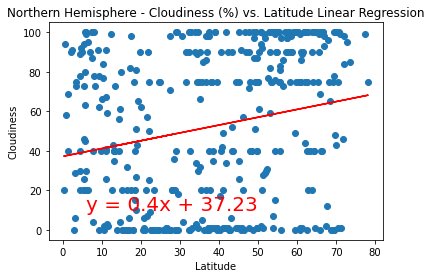

In [19]:
x_values = north_hem['Latitude']
y_values = north_hem['Cloudiness']
(slope_humid, intercept_humid, rvalue_humid, pvalue_humid, stderr_humid) = linregress(x_values, y_values)
regress_values_humid = x_values * slope_humid + intercept_humid
line_eq = "y = " + str(round(slope_humid,2)) + "x + " + str(round(intercept_humid,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_humid,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue_temp**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.43396492357724203


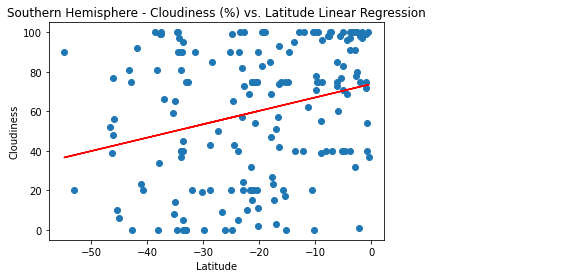

In [20]:
x_values = south_hem['Latitude']
y_values = south_hem['Cloudiness']
(slope_humid, intercept_humid, rvalue_humid, pvalue_humid, stderr_humid) = linregress(x_values, y_values)
regress_values_humid = x_values * slope_humid + intercept_humid
line_eq = "y = " + str(round(slope_humid,2)) + "x + " + str(round(intercept_humid,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_humid,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-value is: {rvalue_temp**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.43396492357724203


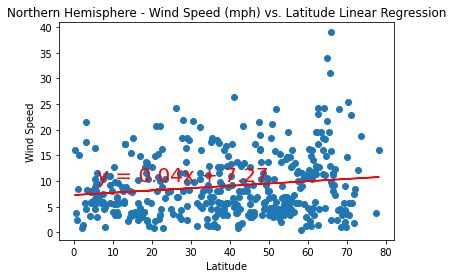

In [21]:
x_values = north_hem['Latitude']
y_values = north_hem['Wind Speed']
(slope_humid, intercept_humid, rvalue_humid, pvalue_humid, stderr_humid) = linregress(x_values, y_values)
regress_values_humid = x_values * slope_humid + intercept_humid
line_eq = "y = " + str(round(slope_humid,2)) + "x + " + str(round(intercept_humid,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_humid,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue_temp**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.43396492357724203


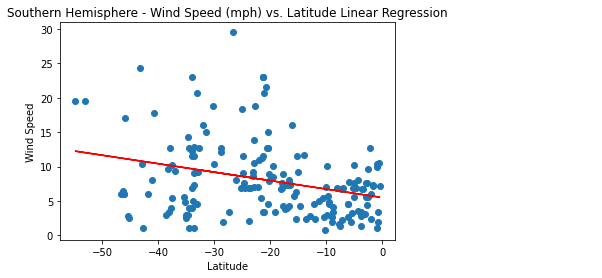

In [22]:
x_values = south_hem['Latitude']
y_values = south_hem['Wind Speed']
(slope_humid, intercept_humid, rvalue_humid, pvalue_humid, stderr_humid) = linregress(x_values, y_values)
regress_values_humid = x_values * slope_humid + intercept_humid
line_eq = "y = " + str(round(slope_humid,2)) + "x + " + str(round(intercept_humid,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values_humid,"r-")
plt.annotate(line_eq,(6,10),fontsize=20,color="red")
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-value is: {rvalue_temp**2}")
plt.show()